# Education Investment Analysis

This notebook analyzes education investment data across EU countries, including economic indicators and policy impacts.

In [1]:
!pip install pandas numpy matplotlib seaborn plotly psycopg2-binary pymongo python-dotenv eurostat statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install pandas numpy matplotlib seaborn plotly psycopg2-binary pymongo python-dotenv eurostat statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install pandas numpy matplotlib seaborn plotly psycopg2-binary pymongo python-dotenv eurostat statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# %%
# Import required libraries
import sys
import os
import json
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import matplotlib

In [5]:
# %%
# Load environment variables from .env file
load_dotenv(Path('..').resolve() / '.env')

True

In [6]:
# %%
# Add project root to Python path
project_root = Path('..').resolve()
sys.path.append(str(project_root))

In [7]:
# %%
# Import project modules
from src.data_processing.db_manager import DatabaseManager
from src.data_processing.data_cleaner import DataCleaner
from src.data_collection.eurostat_collector import EurostatCollector

In [8]:
# %%
# Set plotting style
plt.style.use('seaborn-v0_8')  # Use the v0.8 compatible style
sns.set_theme()  # Use seaborn's default theme
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

## Step 1: Data Collection and Storage

In [9]:
# %%
print("Step 1: Data Collection")
print("-" * 50)

Step 1: Data Collection
--------------------------------------------------


In [10]:
# Initialize collectors and managers
collector = EurostatCollector()
db_manager = DatabaseManager()
cleaner = DataCleaner()

In [11]:
# Collect fresh data
print("\nCollecting education investment data...")
education_data_raw = collector.get_education_investment_data()
print(f"Collected {len(education_data_raw)} education investment records")

2024-12-19 10:41:06,163 - INFO - Getting education investment data...


2024-12-19 10:41:06,594 - INFO - Saved data to cache: education_investment.csv
2024-12-19 10:41:06,595 - INFO - Successfully got education investment data: 2585 records


Collected 2585 education investment records



Collected 2585 education investment records


In [12]:
print("\nCollecting economic indicators...")
economic_data_raw = collector.get_economic_indicators()
print(f"Collected {len(economic_data_raw)} economic indicator records")

2024-12-19 10:41:06,598 - INFO - Getting economic indicators data...
2024-12-19 10:41:06,599 - INFO - Fetching data for indicator: gdp_growth (NY.GDP.MKTP.KD.ZG)


2024-12-19 10:41:08,655 - INFO - Successfully processed gdp_growth data with 378 records
2024-12-19 10:41:08,656 - INFO - Fetching data for indicator: employment_rate (SL.EMP.TOTL.SP.ZS)
2024-12-19 10:41:09,096 - INFO - Successfully processed employment_rate data with 378 records
2024-12-19 10:41:09,096 - INFO - Fetching data for indicator: gdp_per_capita (NY.GDP.PCAP.CD)
2024-12-19 10:41:09,514 - INFO - Successfully processed gdp_per_capita data with 378 records
2024-12-19 10:41:09,515 - INFO - Fetching data for indicator: industry_value (NV.IND.TOTL.ZS)
2024-12-19 10:41:09,799 - INFO - Successfully processed industry_value data with 378 records
2024-12-19 10:41:09,799 - INFO - Merging dataframe 1 with shape (378, 3)
2024-12-19 10:41:09,801 - INFO - Merging dataframe 2 with shape (378, 3)
2024-12-19 10:41:09,802 - INFO - Merging dataframe 3 with shape (378, 3)
2024-12-19 10:41:09,806 - INFO - Saved data to cache: economic_indicators.csv
2024-12-19 10:41:09,807 - INFO - Successfully go

Collected 378 economic indicator records



Collected 378 economic indicator records


In [13]:
print("\nCollecting education policies...")
policy_docs = collector.get_education_policies()
print(f"Collected {len(policy_docs)} policy documents")

2024-12-19 10:41:09,809 - INFO - Getting education policy documents...


2024-12-19 10:41:10,187 - INFO - Saved policy documents to cache
2024-12-19 10:41:10,187 - INFO - Successfully got education policy documents: 1 documents


Collected 1 policy documents


## Step 2: Database Storage

In [14]:
# %%
print("\nStep 2: Data Storage")
print("-" * 50)


Step 2: Data Storage
--------------------------------------------------


In [15]:
# Store data in databases
print("\nConnecting to databases...")
try:
    db_manager.connect_postgres()
    print("Successfully connected to PostgreSQL")
except Exception as e:
    print(f"Error connecting to PostgreSQL: {str(e)}")
    print("Cannot proceed without PostgreSQL connection")
    sys.exit(1)


Connecting to databases...


2024-12-19 10:41:14,156 - INFO - Successfully connected to PostgreSQL


Successfully connected to PostgreSQL


In [16]:
try:
    db_manager.connect_mongo()
    print("Successfully connected to MongoDB")
except Exception as e:
    print(f"Warning: MongoDB connection failed: {str(e)}")
    print("Continuing without MongoDB...")

2024-12-19 10:41:14,165 - INFO - Attempting to connect to MongoDB at 47.91.31.227:27017
2024-12-19 10:41:16,506 - INFO - Successfully connected to MongoDB


Successfully connected to MongoDB


Successfully connected to MongoDB


In [17]:
# %%
print("\nSetting up database tables...")
try:
    db_manager.create_tables()
    print("Successfully set up PostgreSQL tables")
except Exception as e:
    print(f"Error setting up tables: {str(e)}")
    sys.exit(1)


Setting up database tables...


2024-12-19 10:41:19,939 - INFO - Tables created successfully


Successfully set up PostgreSQL tables


In [18]:
# %%
print("\nSaving data to PostgreSQL...")
try:
    # Insert data using the specific insert methods
    db_manager.insert_education_data(education_data_raw)
    db_manager.insert_economic_data(economic_data_raw)
    print("Successfully saved data to PostgreSQL")
except Exception as e:
    print(f"Error saving to PostgreSQL: {str(e)}")
    sys.exit(1)


Saving data to PostgreSQL...


2024-12-19 10:41:23,203 - INFO - Saved batch 1 (1000 rows)
2024-12-19 10:41:24,523 - INFO - Saved batch 2 (1000 rows)
2024-12-19 10:41:25,849 - INFO - Saved batch 3 (1000 rows)
2024-12-19 10:41:26,915 - INFO - Saved batch 4 (1000 rows)
2024-12-19 10:41:28,017 - INFO - Saved batch 5 (1000 rows)
2024-12-19 10:41:29,063 - INFO - Saved batch 6 (1000 rows)
2024-12-19 10:41:30,129 - INFO - Saved batch 7 (1000 rows)
2024-12-19 10:41:31,194 - INFO - Saved batch 8 (1000 rows)
2024-12-19 10:41:32,676 - INFO - Saved batch 9 (1000 rows)
2024-12-19 10:41:33,737 - INFO - Saved batch 10 (1000 rows)
2024-12-19 10:41:34,801 - INFO - Saved batch 11 (1000 rows)
2024-12-19 10:41:35,862 - INFO - Saved batch 12 (1000 rows)
2024-12-19 10:41:36,915 - INFO - Saved batch 13 (1000 rows)
2024-12-19 10:41:38,415 - INFO - Saved batch 14 (1000 rows)
2024-12-19 10:41:39,473 - INFO - Saved batch 15 (1000 rows)
2024-12-19 10:41:40,509 - INFO - Saved batch 16 (1000 rows)
2024-12-19 10:41:41,577 - INFO - Saved batch 17 (

Successfully saved data to PostgreSQL


2024-12-16 23:00:05,054 - INFO - Saved batch 3 (1000 rows)


2024-12-16 23:00:06,041 - INFO - Saved batch 4 (1000 rows)


2024-12-16 23:00:07,052 - INFO - Saved batch 5 (1000 rows)


2024-12-16 23:00:08,035 - INFO - Saved batch 6 (1000 rows)


2024-12-16 23:00:09,025 - INFO - Saved batch 7 (1000 rows)


2024-12-16 23:00:10,003 - INFO - Saved batch 8 (1000 rows)


2024-12-16 23:00:10,998 - INFO - Saved batch 9 (1000 rows)


2024-12-16 23:00:11,981 - INFO - Saved batch 10 (1000 rows)


2024-12-16 23:00:12,973 - INFO - Saved batch 11 (1000 rows)


2024-12-16 23:00:13,963 - INFO - Saved batch 12 (1000 rows)


2024-12-16 23:00:14,953 - INFO - Saved batch 13 (1000 rows)


2024-12-16 23:00:15,961 - INFO - Saved batch 14 (1000 rows)


2024-12-16 23:00:16,946 - INFO - Saved batch 15 (1000 rows)


2024-12-16 23:00:17,944 - INFO - Saved batch 16 (1000 rows)


2024-12-16 23:00:18,935 - INFO - Saved batch 17 (1000 rows)


2024-12-16 23:00:19,909 - INFO - Saved batch 18 (756 rows)


2024-12-16 23:00:19,910 - INFO - Successfully saved 17756 rows to education_data


2024-12-16 23:00:19,911 - INFO - Successfully inserted 2585 rows of education data


2024-12-16 23:00:21,574 - INFO - Saved batch 1 (378 rows)


2024-12-16 23:00:21,577 - INFO - Successfully saved 378 rows to economic_data


2024-12-16 23:00:21,578 - INFO - Successfully inserted 378 rows of economic data


Successfully saved data to PostgreSQL


In [19]:
# %%
print("\nSaving policy documents to MongoDB...")
if db_manager.mongo_db is not None:
    try:
        db_manager.save_to_mongo('education_policies', policy_docs)
        print("Successfully saved policy documents to MongoDB")
    except Exception as e:
        print(f"Warning: Failed to save to MongoDB: {str(e)}")
        print("Continuing without policy data...")
else:
    print("Skipping MongoDB storage as connection is not available")


Saving policy documents to MongoDB...


2024-12-19 10:41:44,638 - INFO - Successfully saved 1 documents to education_policies


Successfully saved policy documents to MongoDB


## Step 3: Data Retrieval and Analysis

In [20]:
# %%
print("\nStep 3: Data Retrieval and Analysis")
print("-" * 50)


Step 3: Data Retrieval and Analysis
--------------------------------------------------


In [21]:
# Get education investment data from PostgreSQL
print("\nRetrieving data from databases...")
try:
    education_data = db_manager.get_education_data()
    print(f"Retrieved {len(education_data)} education investment records")

    economic_data = db_manager.get_economic_data()
    print(f"Retrieved {len(economic_data)} economic indicator records")
except Exception as e:
    print(f"Error retrieving data from PostgreSQL: {str(e)}")
    sys.exit(1)


Retrieving data from databases...


2024-12-19 10:42:21,103 - INFO - Retrieved 17756 rows of education data


Retrieved 17756 education investment records
Retrieved 378 economic indicator records


Retrieved 378 economic indicator records


In [22]:
# Try to get policy data from MongoDB
policy_docs = []
if db_manager.mongo_db is not None:
    try:
        policy_data = db_manager.query_mongo('education_policies')
        policy_docs = list(policy_data)
        print(f"Retrieved {len(policy_docs)} education policy documents")
    except Exception as e:
        print(f"Warning: Could not retrieve MongoDB data: {str(e)}")
        print("Continuing without policy data...")

Retrieved 28 education policy documents


## Step 4: Data Analysis

In [23]:
# %%
print("\nStep 4: Data Analysis")
print("-" * 50)


Step 4: Data Analysis
--------------------------------------------------


In [24]:
# Clean and prepare data
education_data_cleaned = cleaner.clean_education_data(education_data)
print(f"\nCleaned education data shape: {education_data_cleaned.shape}")

2024-12-19 10:42:23,621 - INFO - Successfully cleaned education data: 16743 rows remaining



Cleaned education data shape: (16743, 9)


### Analysis 1: Major EU Countries Investment Trends

In [25]:
# %%
print("\nAnalyzing major EU countries...")
major_countries = ['DE', 'FR', 'IT', 'ES', 'PL']
major_country_data = education_data_cleaned[
    education_data_cleaned['geo_time_period'].isin(major_countries)
]


Analyzing major EU countries...


In [26]:
country_names = {
    'DE': 'Germany',
    'FR': 'France',
    'IT': 'Italy',
    'ES': 'Spain',
    'PL': 'Poland'
}

In [27]:
# Visualization 1: Investment Trends
plt.figure(figsize=(15, 8))
colors = {'DE': 'blue', 'FR': 'red', 'IT': 'green', 'ES': 'orange', 'PL': 'purple'}

<Figure size 1500x800 with 0 Axes>

Plotted data for Germany
Plotted data for France
Plotted data for Italy
Plotted data for Spain
Plotted data for Poland


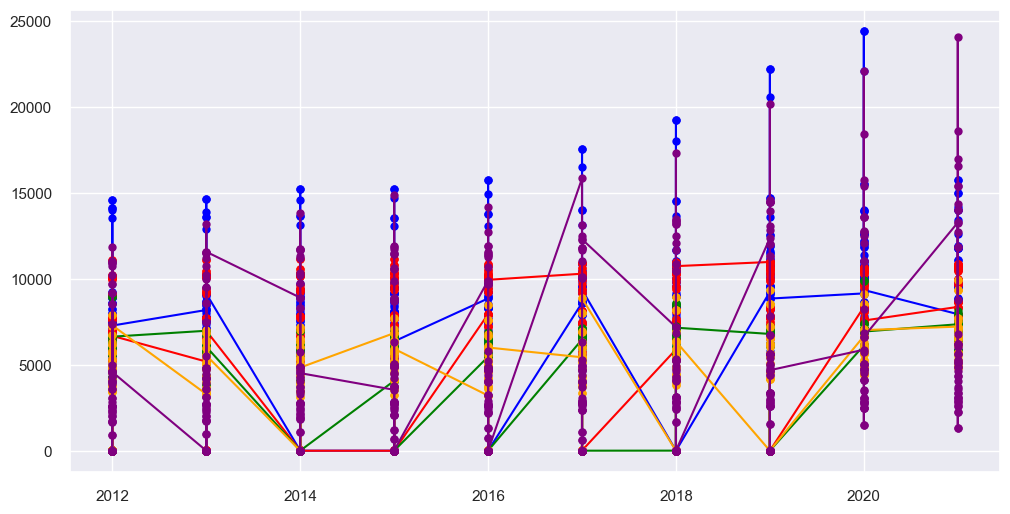

In [28]:
plotted_countries = []

for country in major_countries:
    country_data = major_country_data[major_country_data['geo_time_period'] == country]
    if not country_data.empty:
        country_data = country_data.sort_values('year')
        plt.plot(country_data['year'], 
                country_data['value'], 
                label=country_names[country],
                color=colors[country],
                marker='o')
        plotted_countries.append(country)
        print(f"Plotted data for {country_names[country]}")


Plot ranges - X: (2011.55, 2021.45), Y: (-1198.9550000000002, 25294.655000000002)


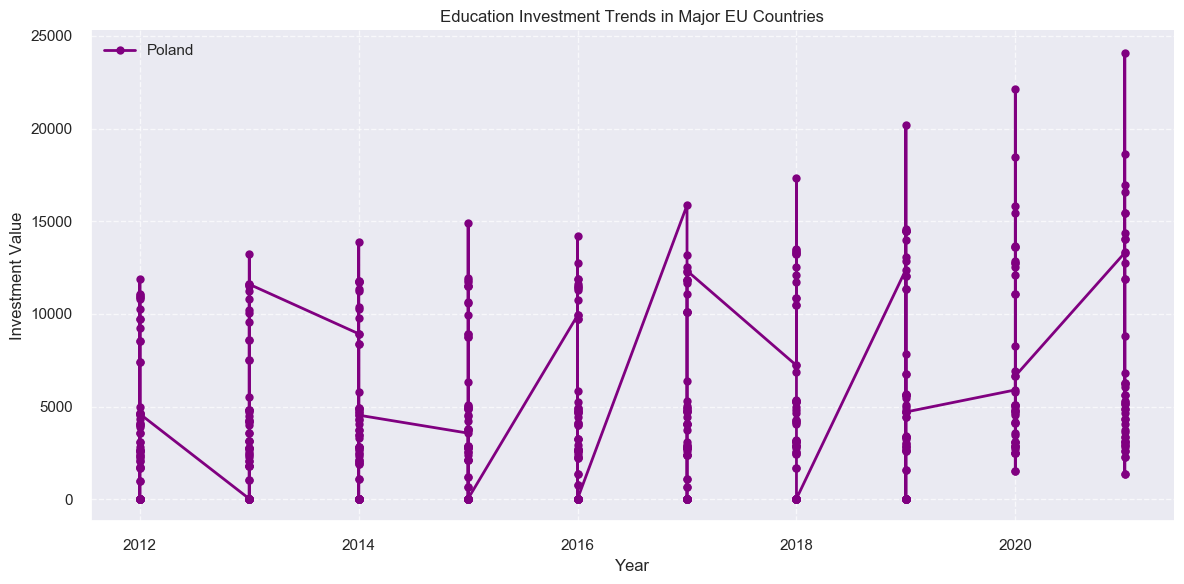


Compound Annual Growth Rate (CAGR) by Country:
----------------------------------------


In [29]:
plt.plot(country_data['year'], 
         country_data['value'],
         label=country_names[country],  # 添加标签
         color=colors[country],
         marker='o',
         markersize=6,
         linewidth=2,
         linestyle='-')

plt.title('Education Investment Trends in Major EU Countries')
plt.xlabel('Year')
plt.ylabel('Investment Value')

# Only add legend if we have plotted countries
if plotted_countries:
    plt.legend()
else:
    print("Warning: No data was plotted!")

plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Debug: Print the axis limits
print(f"\nPlot ranges - X: {plt.gca().get_xlim()}, Y: {plt.gca().get_ylim()}")

plt.show()

# Calculate and display CAGR
print("\nCompound Annual Growth Rate (CAGR) by Country:")
print("-" * 40)

In [30]:
# %%
# Calculate and display CAGR
print("\nCompound Annual Growth Rate (CAGR) by Country:")
print("-" * 40)


Compound Annual Growth Rate (CAGR) by Country:
----------------------------------------


In [31]:
for country in major_countries:
    country_data = major_country_data[major_country_data['geo_time_period'] == country]
    if len(country_data) >= 2:
        # Sort by year and get first and last values
        country_data = country_data.sort_values('year')
        first_year = country_data.iloc[0]
        last_year = country_data.iloc[-1]
        
        # Calculate CAGR
        years = last_year['year'] - first_year['year']
        if years > 0:
            cagr = (((last_year['value'] / first_year['value']) ** (1/years)) - 1) * 100
            print(f"{country_names[country]}: {cagr:.2f}%")

Germany: 96.74%
France: 0.87%
Italy: -1.55%
Spain: 95.17%
Poland: -6.19%


### Analysis 2: Economic Correlation Analysis

In [32]:
# %%
print("\nAnalyzing correlation with economic indicators...")
print("-" * 40)


Analyzing correlation with economic indicators...
----------------------------------------


In [33]:
# Merge education and economic data
merged_data = pd.merge(
    education_data_cleaned,
    economic_data,
    left_on=['geo_time_period', 'year'],
    right_on=['country_code', 'year'],
    how='inner'
)

In [34]:
if not merged_data.empty:
    # Calculate correlations
    correlation_vars = ['value', 'gdp_growth', 'employment_rate', 'gdp_per_capita']
    correlations = merged_data[correlation_vars].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation between Education Investment and Economic Indicators')
    plt.tight_layout()
    plt.show()
    
    # Print key findings
    edu_gdp_corr = correlations.loc['value', 'gdp_per_capita']
    edu_emp_corr = correlations.loc['value', 'employment_rate']
    print(f"\nKey Correlations:")
    print(f"Education Investment vs GDP per capita: {edu_gdp_corr:.2f}")
    print(f"Education Investment vs Employment Rate: {edu_emp_corr:.2f}")

### Analysis 3: Policy Impact Analysis

In [35]:
# %%
if policy_docs:
    print("\nAnalyzing Policy Impact...")
    print("-" * 40)
    
    # Extract policy years and analyze investment changes
    policy_years = []
    policy_countries = []
    
    for doc in policy_docs:
        if 'year' in doc and 'country' in doc:
            policy_years.append(doc['year'])
            policy_countries.append(doc['country'])
    
    if policy_years:
        # Analyze investment changes around policy implementation
        for country, year in zip(policy_countries, policy_years):
            country_data = education_data_cleaned[
                education_data_cleaned['geo_time_period'] == country
            ]
            
            if not country_data.empty:
                # Get investment before and after policy
                before_policy = country_data[country_data['year'] < year]['value'].mean()
                after_policy = country_data[country_data['year'] >= year]['value'].mean()
                
                change_pct = ((after_policy - before_policy) / before_policy) * 100
                print(f"\nCountry: {country}")
                print(f"Policy Year: {year}")
                print(f"Average Investment Change: {change_pct:.2f}%")


Analyzing Policy Impact...
----------------------------------------


### Analysis 4: Investment Efficiency Analysis

In [36]:
# %%
print("\nAnalyzing Investment Efficiency...")
print("-" * 40)


Analyzing Investment Efficiency...
----------------------------------------


In [37]:
if not merged_data.empty:
    # Calculate investment efficiency (GDP per capita / Education Investment)
    merged_data['investment_efficiency'] = merged_data['gdp_per_capita'] / merged_data['value']
    
    # Get top 5 most efficient countries
    latest_year = merged_data['year'].max()
    latest_efficiency = merged_data[merged_data['year'] == latest_year]
    top_efficient = latest_efficiency.nlargest(5, 'investment_efficiency')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_efficient, x='geo_time_period', y='investment_efficiency')
    plt.title(f'Top 5 Countries by Investment Efficiency ({latest_year})')
    plt.xlabel('Country')
    plt.ylabel('Efficiency Ratio (GDP per capita / Investment)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 Countries by Investment Efficiency:")
    for _, row in top_efficient.iterrows():
        print(f"{row['geo_time_period']}: {row['investment_efficiency']:.2f}")

## Step 5: Cleanup

In [38]:
# %%
print("\nStep 5: Cleanup")
print("-" * 50)


Step 5: Cleanup
--------------------------------------------------


In [39]:
# Close database connections
print("\nClosing database connections...")
db_manager.close_connections()


Closing database connections...


2024-12-19 10:42:24,344 - INFO - All database connections closed


In [40]:
print("\nAnalysis completed successfully!")


Analysis completed successfully!
